In [87]:
forcefield_type = 'mbpol'
xml_file = ''

#xml_file can be left blank

In [88]:
!python test.py $forcefield_type True $xml_file

appended <mbpol.MBPolElectrostaticsForceGenerator object at 0x7effa2899be0> generator
appended <mbpol.MBPolOneBodyForceGenerator object at 0x7effa2896940> generator
appended <mbpol.MBPolTwoBodyForceGenerator object at 0x7effa2896978> generator
appended <mbpol.MBPolThreeBodyForceGenerator object at 0x7effa28968d0> generator
appended <mbpol.MBPolDispersionForceGenerator object at 0x7effa28967f0> generator
Running with water3.pdb /home/sebastian/anaconda3/lib/python3.4/site-packages/mbpol-1.0-py3.4-linux-x86_64.egg/mbpol.xml
bond constrained between atom 1 and atom 0
bond constrained between atom 2 and atom 0
bond constrained between atom 5 and atom 4
bond constrained between atom 6 and atom 4
bond constrained between atom 9 and atom 8
bond constrained between atom 10 and atom 8
Writing to mbpol_trajectory.pdb
Running Production...
Done!


In [89]:
forcefield._forces

In [90]:
!python test.py $forcefield_type False $xml_file

appended <mbpol.MBPolElectrostaticsForceGenerator object at 0x7f52ffd51ba8> generator
appended <mbpol.MBPolOneBodyForceGenerator object at 0x7f52ffd4ea20> generator
appended <mbpol.MBPolTwoBodyForceGenerator object at 0x7f52ffd4e940> generator
appended <mbpol.MBPolThreeBodyForceGenerator object at 0x7f52ffd4e898> generator
appended <mbpol.MBPolDispersionForceGenerator object at 0x7f52ffd4e8d0> generator
Running with water3.pdb /home/sebastian/anaconda3/lib/python3.4/site-packages/mbpol-1.0-py3.4-linux-x86_64.egg/mbpol.xml
Writing to flexible_mbpol_trajectory.pdb
Running Production...
Done!


In [91]:
!wc mbpol_trajectory.pdb
!wc flexible_mbpol_trajectory.pdb

  1502  14908 102151 mbpol_trajectory.pdb
  1502  14908 102151 flexible_mbpol_trajectory.pdb


In [92]:
import mdtraj

In [93]:
trajectories = mdtraj.load(forcefield_type + '_trajectory.pdb')
flexible_trajectories = mdtraj.load('flexible_' + forcefield_type +'_trajectory.pdb')
#print (trajectories)

In [94]:
distances = mdtraj.compute_distances(trajectories, [[0,1],[0,2],])
flexible_distaces = mdtraj.compute_distances(flexible_trajectories, [[0,1],[0,2]])
#print (distances)

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

#type(distances)

In [96]:
import seaborn as sns
sns.set_style('dark')

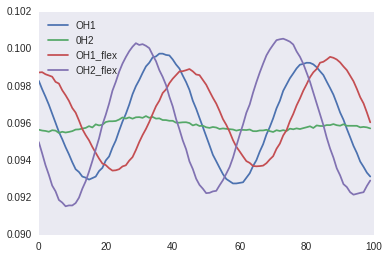

In [97]:
plt.plot(distances[:,0], label='OH1')
plt.plot(distances[:,1], label='0H2')
plt.plot(flexible_distaces[:,0], label='OH1_flex')
plt.plot(flexible_distaces[:,1], label='OH2_flex')
plt.legend(loc='best')
plt.show()

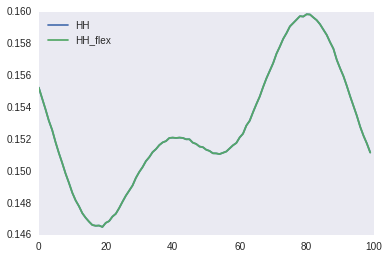

In [98]:
hhdistances = mdtraj.compute_distances(trajectories, [[1,2]])
plt.plot(hhdistances, label='HH')
flexible_hhdistances = mdtraj.compute_distances(flexible_trajectories, [[1,2]])
plt.plot(hhdistances, label='HH_flex')
plt.legend(loc='best')